<a href="https://colab.research.google.com/github/anish-t/Intro_to_ML/blob/main/002100_KNN_Classifier_form_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diabetes Prediction

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install kaggle

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 4.58MB/s]


In [8]:
from zipfile import ZipFile
zip_data='/content/diabetes-dataset.zip'

with ZipFile(zip_data,'r') as zipfile:
  zipfile.extractall()
  print('done')

done


In [9]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv') 

In [10]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [12]:
# separating features and Target
X_raw = diabetes_dataset.drop(columns='Outcome', axis = 1)
Y = diabetes_dataset['Outcome']

In [16]:
# Standardize the Variables
# Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, 
# the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the
# observations, and hence on the KNN classifier, than variables that are on a small scale.

scaler = StandardScaler()
scaler.fit(X_raw)
X = scaler.transform(X_raw) #scaled_features
# scaled_features

In [17]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Model Training

KNN Classifier in Sklearn

In [67]:
classifier = KNeighborsClassifier(n_neighbors=10,p=2)

In [68]:
classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

Model Evaluation

In [69]:
y_pred = classifier.predict(X_test)

In [70]:
accuracy = accuracy_score(Y_test, y_pred)

In [71]:
print(accuracy*100)

72.72727272727273


In [72]:
print(confusion_matrix(Y_test, y_pred))

[[92  8]
 [34 20]]


In [73]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81       100
           1       0.71      0.37      0.49        54

    accuracy                           0.73       154
   macro avg       0.72      0.65      0.65       154
weighted avg       0.72      0.73      0.70       154



**Choosing a K Value** <br>
Let's go ahead and use the elbow method to pick a good K Value:

In [65]:
error_rate = []

for i in range(1,40): # Will take some time
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

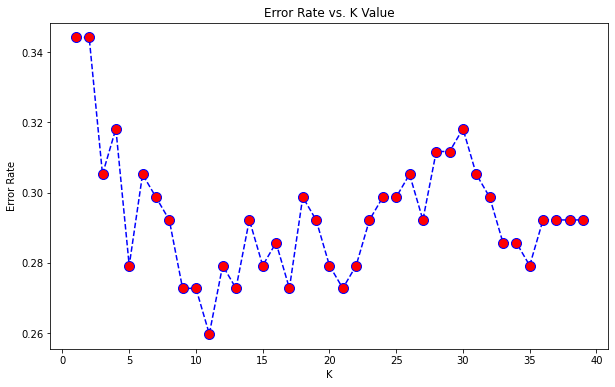

In [66]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')